<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/AICE_Associate_Chapter08_%EC%A2%85%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#선형 회귀

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/국민건강보험공단_건강검진정보_20211231_수정.CSV', encoding='cp949')
pd.set_option('display.max_columns', None)
df.drop(['치아우식증유무', '치석','시력(좌)', '시력(우)', '청력(좌)', '청력(우)','구강검진수검여부','기준년도', '가입자일련번호', '시도코드', '성별'],
                 axis=1, inplace=True)
df.head(3)

,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부
0,10,160,65,86.4,110.0,72.0,179.0,NaN,NaN,NaN,NaN,14.3,1.0,0.8,18.0,20.0,28.0,1.0,1.0
1,8,175,90,94.0,126.0,76.0,86.0,NaN,NaN,NaN,NaN,16.0,1.0,0.8,58.0,144.0,74.0,1.0,1.0
2,13,160,55,80.0,183.0,109.0,115.0,NaN,NaN,NaN,NaN,13.8,1.0,0.8,32.0,26.0,38.0,1.0,1.0


In [ ]:
train = df.dropna(axis=0)
test = df[df['LDL콜레스테롤'].isnull()]

X = train.drop('LDL콜레스테롤', axis=1)
y = train['LDL콜레스테롤']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state =42)

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print("기울기 = ", reg.coef_)
print("절편 = ", reg.intercept_)

print("\n---column 별---")
for i, v in enumerate(reg.coef_):
  print(X_train.columns[i] + " :" + str(v))


기울기 =  [ 0.07504877  0.02436839  0.03984692  0.07006197 -0.01134489 -0.0169368
 -0.00398696  0.96371436 -0.17038637 -0.66997818  0.15014143  0.06685567
  0.11166802 -0.01565601  0.0122948  -0.00499188  0.19822968 -0.8545701 ]
절편 =  -27.041384181425443

---column 별---
연령대코드(5세단위) :0.07504876582677455
신장(5cm단위) :0.02436838624290849
체중(5kg단위) :0.039846923580407693
허리둘레 :0.07006197239231851
수축기혈압 :-0.01134489461360145
이완기혈압 :-0.016936802963822776
식전혈당(공복혈당) :-0.003986960487338668
총콜레스테롤 :0.9637143587698423
트리글리세라이드 :-0.17038637340316576
HDL콜레스테롤 :-0.6699781830563377
혈색소 :0.15014143013055298
요단백 :0.06685566529591505
혈청크레아티닌 :0.11166801919216951
혈청지오티(AST) :-0.015656006321437217
혈청지피티(ALT) :0.012294803445864196
감마지티피 :-0.004991882110849657
흡연상태 :0.1982296777847982
음주여부 :-0.8545700979015762


In [ ]:
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
print("mse value ", mse)

mse value  51.96327058869079


#로지스틱 회귀

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
X_train = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
y_train = [0,0,0,0,0,0,0,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1]

X_test = [0,1,2,18,19]
y_test = [0,0,0,1 ,1]

X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
#1. f(x) : logit function
logi_reg = LogisticRegression()
logi_reg.fit(X_train, y_train)
print(f"coef : {logi_reg.coef_}, intercept : {logi_reg.intercept_}")

coef : [[1.19388731]], intercept : [-11.34176791]


In [ ]:
#2. (x, y) : (x, y) of logit function
y = []
for x in X_train:
  y.append(x*logi_reg.coef_[0] + logi_reg.intercept_)
y = np.array(y)

#3. p : probability of y
p = sigmoid(y)
p = p.reshape(-1,1)

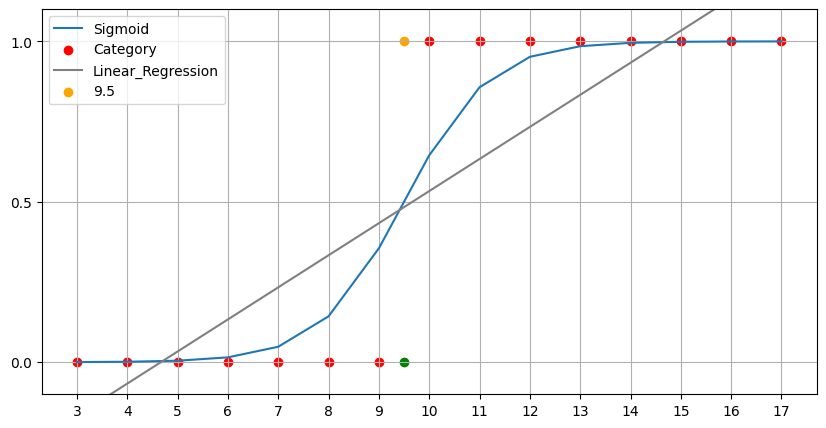

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(X_train,  p)
plt.scatter(X_train, y_train, color='red')
plt.xticks(np.arange(3,18,1))
plt.yticks([0, 0.5, 1])
plt.ylim([-0.1, 1.1])

# + Linear Regression result
lr = LinearRegression()
lr.fit(X_train, y_train)
plt.plot(X_train, X_train*lr.coef_[0] + lr.intercept_, color='grey')

# + 확인문제
res = logi_reg.predict(np.array([9.5]).reshape(-1,1))
plt.scatter(9.5, res, color='orange', )

res2 = lr.predict(np.array(9.5).reshape(-1,1))
plt.scatter(9.5, round(res2[0]), color='green')

plt.legend(['Sigmoid','Category','Linear_Regression','9.5'])
plt.show()

#의사결정나무

In [ ]:
!pip install graphviz

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
df = pd.read_csv('/content/국민건강보험공단_건강검진정보_20211231_수정.CSV', encoding='cp949')
df_sample = df[['신장(5cm단위)','성별','체중(5kg단위)','음주여부']]
df_sample.dropna(inplace=True)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999829 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   신장(5cm단위)  999829 non-null  int64  
 1   성별         999829 non-null  int64  
 2   체중(5kg단위)  999829 non-null  int64  
 3   음주여부       999829 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 38.1 MB


<ipython-input-114-b5d6f135c849>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample.dropna(inplace=True)


In [ ]:
X = df_sample.drop('음주여부', axis=1)
y = df_sample['음주여부']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 42)

dt = DecisionTreeClassifier(random_state = 42, max_depth = 2)
dt.fit(X_train, y_train)

print("학습 정확도 : ", dt.score(X_train, y_train))
print("검증 정확도 : ", dt.score(X_train, y_train))

학습 정확도 :  0.6897831253602179
검증 정확도 :  0.6897831253602179


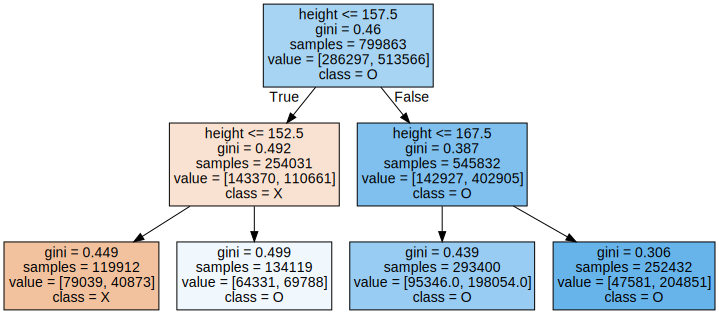

In [ ]:
tree_pic = graphviz.Source(export_graphviz(dt, class_names=['X','O'], feature_names = ['height','sex','weight'], impurity = True, filled=True))
tree_pic.render('tree_pic',format='png')
tree_pic

In [ ]:
#확인문제 1

for i in (1,15,30):
  dt = DecisionTreeClassifier(random_state = 1001, max_depth = i)
  dt.fit(X_train, y_train)
  print(f"{i} score : ", dt.score(X_test, y_test))

1 score :  0.682676054929338
15 score :  0.6924677195123171
30 score :  0.6924677195123171


In [ ]:
#확인문제 2

for i in [1,2,3]:
  dt = DecisionTreeClassifier(random_state = 1001, max_features = i, max_depth = 1)
  dt_model = dt.fit(X_train, y_train)
  print(f"{i} train score : {round(dt_model.score(X_train, y_train),3)} val score : {round(dt_model.score(X_test, y_test),3)}", )

1 train score : 0.683 val score : 0.683
2 train score : 0.683 val score : 0.683
3 train score : 0.683 val score : 0.683


#랜덤포레스트

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()
print("original shapes : ", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
print("changed shapes : ", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

original shapes :  (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
changed shapes :  (60000, 784) (60000,) (10000, 784) (10000,)


In [ ]:
#의사결정나무
dct = DecisionTreeClassifier()
dct.fit(X_train, y_train)

dct_train_acc = dct.score(X_train, y_train)
dct_val_acc = dct.score(X_test, y_test)

print("train 정확도 : ", dct_train_acc)
print("val 정확도 : ", dct_val_acc)

train 정확도 :  1.0
val 정확도 :  0.8754


In [ ]:
#랜덤포레스트
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_train_acc = rfc.score(X_train, y_train)
rfc_val_acc = rfc.score(X_test, y_test)

print("train 정확도 : ", rfc_train_acc)
print("val 정확도 : ", rfc_val_acc)

train 정확도 :  1.0
val 정확도 :  0.9698


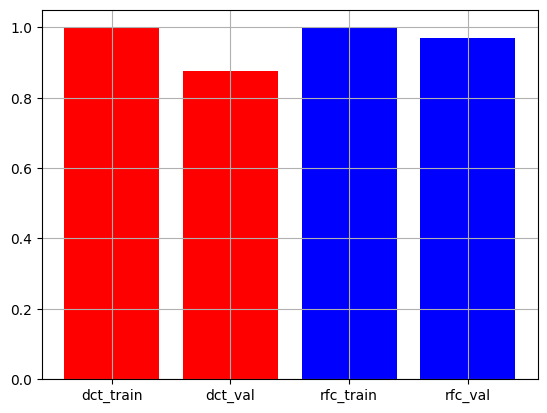

In [ ]:
plt.figure()
plt.bar(x = ['dct_train', 'dct_val'], height = [dct_train_acc, dct_val_acc], color='red')
plt.bar(x = ['rfc_train', 'rfc_val'], height = [rfc_train_acc, rfc_val_acc], color='blue' )
plt.show()

#랜덤포레스트 일부러 팔다리 자르기 == 의사결정나무

In [ ]:
rfc_debuff = RandomForestClassifier(
    random_state = 0,
    n_estimators = 1,
    max_features = None,
    bootstrap=False
)
rfc_debuff.fit(X_train, y_train)

rfc_debuff_train_acc = rfc_debuff.score(X_train, y_train)
rfc_debuff_val_acc = rfc_debuff.score(X_test, y_test)


Decision Tree normal : 1.0, 0.8754
random forest debuffed : 1.0, 0.8773


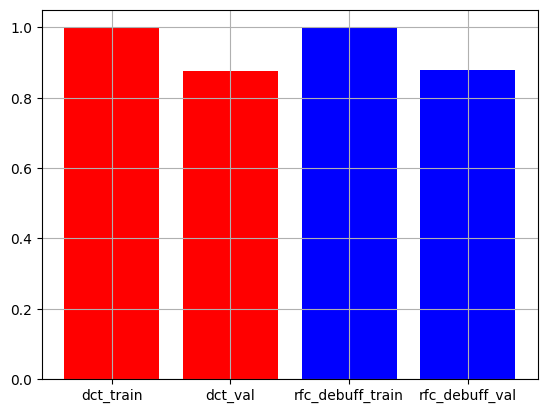

In [ ]:
print(f"Decision Tree normal : {dct_train_acc}, {dct_val_acc}")
print(f"random forest debuffed : {rfc_debuff_train_acc}, {rfc_debuff_val_acc}" )

plt.figure()
plt.bar(x = ['dct_train', 'dct_val'], height = [dct_train_acc, dct_val_acc], color='red')
plt.bar(x = ['rfc_debuff_train', 'rfc_debuff_val'], height = [rfc_debuff_train_acc, rfc_debuff_val_acc], color='blue' )
plt.grid(True)
plt.show()

In [ ]:
#확인 문제
for i in [40, 50, 60]:
  rfc = RandomForestClassifier(
      random_state = 0,
      max_features = i
  )
  rfc.fit(X_train, y_train)
  rfc_train_acc = rfc.score(X_train, y_train)
  rfc_val_acc = rfc.score(X_test, y_test)

  print("-----> max_features : ",i)
  print("train 정확도 : ", rfc_train_acc)
  print("val 정확도 : ", rfc_val_acc)


-----> max_features :  40
train 정확도 :  1.0
val 정확도 :  0.97
-----> max_features :  50
train 정확도 :  1.0
val 정확도 :  0.9713
-----> max_features :  60
train 정확도 :  1.0
val 정확도 :  0.9697
